# 1) Apresentação do Desafio

Olá meu nome é Antônio, sou cientista de dados e ao longo desse desafio você irá imergir em um estudo relacionado as ocorrências aeronáuticas na aviação civil brasileira.

### <font color='#4F4F4F'>Sobre os Dados</font> (https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira)
A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA nos últimos 10 anos e que ocorreram em solo brasileiro. 

Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG). São resguardadas a privacidade de pessoas físicas/jurídicas envolvidas conforme previsto pela Lei de Acesso à Informação (Lei n° 12.527, de 18 de novembro de 2011).

Essa base de dados é composta por informações preliminares provenientes do formulário CENIPA-05 (Ficha de Notificação de Ocorrências Aeronáuticas) e consolidada a partir dos relatórios de investigações publicados. Outra forma de visualização desses dados é pelo Painel SIPAER disponível na página do CENIPA.

Dados proveniente dos Programas de Gerenciamento de Prevenção administrados pelo CENIPA (Emissão de Raio Laser e Risco Baloeiro) não constam nesta base. Esses programas possuem formulários próprios para coleta de dados com foco exclusivo para gerenciamento do risco, enquanto os dados coletados pelo formulário CENIPA-05 têm foco principal na investigação de acidentes (AIG).

### <font color='#4F4F4F'>Objetivo desse Desafio</font>
O objetivo deste teste é explorar e demonstrar minhas habilidades como Cientista de Dados e criatividade com as análises. Os passos a serem entregues são:

1) Apresentação do desafio;

2) Explicação do processo utilizado;

3) Análise exploratória;

4) Hipóteses levantadas;

5) Conclusão e insights gerados.

### <font color='#4F4F4F'>Critérios a Serem Avaliados</font>
1) Capacidade analítica;

2) Qualidade do storytelling na apresentação do problema e no código;

3) Qualidade e clareza do código.

# 2) Explicação do Processo Utilizado

##  <font color='#4F4F4F'>2.1) Metodologia Utilizada</font>

A metodologia utilizada nesse estudo se baseia na investigação exploratória das bases de dados afim de descrever os comportamentos e tentar traças conexões, a linha de segmento do estudo será baseado nas seguintes etapas de investigação:

**1) Identificação dos maiores eventos de ocorrência**

	Investigando por classificação
	Investigando por estado
	Investigando por cidade
	Investigando por hora

**2) Investigando o tipo de ocorrência, fator de contribuição e aeronave**

	Investigando o tipo de ocorrência
	Investigando o fator de contribuição
	Investigando a aeronave

**3) Investigando as recomendações**

Essa estratégia de exploração busca entender o fenômeno no item **1)**, identificar possíveis causas das ocorrencias no item **2)** e por fim, verificar se as recomendações, item **3)**, estão sendo efetivas para redução dos acidentes.

## <font color='#4F4F4F'>2.2) Bibliotecas Utilizadas</font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from datetime import datetime

%matplotlib inline

## <font color='#4F4F4F'>2.3) Bases de Dados Utilizadas</font>

### <font color='#4F4F4F'>2.3.1) Importação das Bases de Dados</font>

As bases de dados utilizadas foram coletadas a partir do portal brasileiro de dados abertos (https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira)

In [2]:
ocorrencias = pd.read_csv("http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv", sep=';')
tipo_de_ocorrencia = pd.read_csv("http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv", sep=';')
aeronave = pd.read_csv("http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv", sep=';')
fator_contribuinte = pd.read_csv("http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv", sep=';')
recomendação_de_seguranca = pd.read_csv("http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv", sep=';')

### <font color='#4F4F4F'>2.3.2) Conhecendo as Bases de Dados</font>

In [3]:
ocorrencias.info()
ocorrencias.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               6114 non-null   int64 
 1   codigo_ocorrencia1              6114 non-null   int64 
 2   codigo_ocorrencia2              6114 non-null   int64 
 3   codigo_ocorrencia3              6114 non-null   int64 
 4   codigo_ocorrencia4              6114 non-null   int64 
 5   ocorrencia_classificacao        6114 non-null   object
 6   ocorrencia_latitude             4552 non-null   object
 7   ocorrencia_longitude            4552 non-null   object
 8   ocorrencia_cidade               6114 non-null   object
 9   ocorrencia_uf                   6114 non-null   object
 10  ocorrencia_pais                 6114 non-null   object
 11  ocorrencia_aerodromo            6114 non-null   object
 12  ocorrencia_dia                  6114 non-null   

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,...,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,...,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,...,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,...,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [4]:
tipo_de_ocorrencia.info()
tipo_de_ocorrencia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia1         6283 non-null   int64 
 1   ocorrencia_tipo            6283 non-null   object
 2   ocorrencia_tipo_categoria  6283 non-null   object
 3   taxonomia_tipo_icao        6283 non-null   object
dtypes: int64(1), object(3)
memory usage: 196.5+ KB


,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
1,39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP


In [5]:
fator_contribuinte.info()
fator_contribuinte.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   4485 non-null   int64 
 1   fator_nome           4485 non-null   object
 2   fator_aspecto        4485 non-null   object
 3   fator_condicionante  4485 non-null   object
 4   fator_area           4485 non-null   object
dtypes: int64(1), object(4)
memory usage: 175.3+ KB


,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [6]:
aeronave.info()
aeronave.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           6188 non-null   int64  
 1   aeronave_matricula           6188 non-null   object 
 2   aeronave_operador_categoria  6188 non-null   object 
 3   aeronave_tipo_veiculo        6188 non-null   object 
 4   aeronave_fabricante          6188 non-null   object 
 5   aeronave_modelo              6188 non-null   object 
 6   aeronave_tipo_icao           6188 non-null   object 
 7   aeronave_motor_tipo          6185 non-null   object 
 8   aeronave_motor_quantidade    6188 non-null   object 
 9   aeronave_pmd                 6188 non-null   int64  
 10  aeronave_pmd_categoria       6188 non-null   int64  
 11  aeronave_assentos            6010 non-null   float64
 12  aeronave_ano_fabricacao      6005 non-null   float64
 13  aeronave_pais_fabr

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,...,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,...,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,...,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0


In [7]:
recomendação_de_seguranca.info()
recomendação_de_seguranca.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   codigo_ocorrencia4               1872 non-null   int64 
 1   recomendacao_numero              1872 non-null   object
 2   recomendacao_dia_assinatura      1872 non-null   object
 3   recomendacao_dia_encaminhamento  1872 non-null   object
 4   recomendacao_dia_feedback        1146 non-null   object
 5   recomendacao_conteudo            1871 non-null   object
 6   recomendacao_status              1872 non-null   object
 7   recomendacao_destinatario_sigla  1872 non-null   object
 8   recomendacao_destinatario        1872 non-null   object
dtypes: int64(1), object(8)
memory usage: 131.8+ KB


,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,39115,095/2011,2011-07-21,2011-08-01,2015-12-21,Revisar os requisitos de experiência recente p...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,39115,096/2011,2011-07-21,2011-08-01,2011-09-16,Divulgar o presente relatório final aos operad...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,39156,063/2011,2011-06-30,2011-08-01,2011-09-12,Divulgar este Relatório aos operadores de aero...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
3,39156,064/2011,2011-06-30,2011-08-01,2014-04-16,Acompanhar junto à autoridade primária de cert...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,39235,205/2011,2011-08-29,2011-09-29,2012-11-06,Realizar uma vistoria de segurança de voo na A...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


### <font color='#4F4F4F'>2.3.3) Modelo de dados</font>

<ipython-input-8-d6e571d561ce>:1: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  modelo_de_dados = mpimg.imread('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/modelo_dados.png')


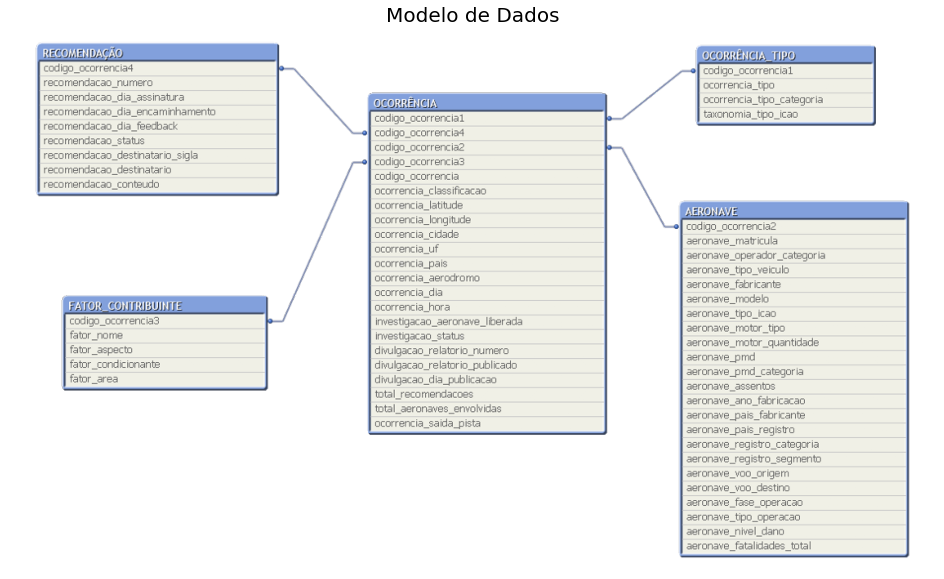

In [8]:
modelo_de_dados = mpimg.imread('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/modelo_dados.png')
plt.figure(figsize=(17,10))
plt.axis('off')
plt.imshow(modelo_de_dados)
plt.title("Modelo de Dados", fontsize = 20)
plt.show()

# 3) Análise Exploratória

## <font color='#4F4F4F'>3.1) Funções</font>

In [9]:
#Gráficos

def linha(titulo, eixo_x, eixo_y, data, x, y):
    sns.set_theme(style="white", context="talk")
    plt.figure(figsize=(15,10))
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(titulo, fontsize = 20)
    g1 = sns.lineplot(data=data, x=x,y=y)
    g1.set_xlabel(eixo_x, fontsize = 20)
    g1.set_ylabel(eixo_y, fontsize = 20)
    plt.show()
    
def barra(titulo, eixo_x, eixo_y, data, x, y):
    sns.set_theme(style="white", context="talk")
    plt.figure(figsize=(15,10))
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(titulo, fontsize = 20)
    g2 = sns.barplot(data=data, x=x,y=y, palette="dark:salmon_r")
    g2.set_xlabel(eixo_x, fontsize = 20)
    g2.set_ylabel(eixo_y, fontsize = 20)
    plt.show()
    
def barra2(titulo1, titulo2, eixo_x, eixo_y, data, x, y, data2, x2, y2):
    sns.color_palette("rocket")
    plt.figure(figsize=(16,10))
    
    plt.subplot(2,2,1)
    g2 = sns.barplot(data=data, x=x,y=y, palette="ch:s=-.2,r=.6")
    plt.title(titulo1, fontsize = 12)
    g2.set_xlabel(eixo_x, fontsize = 12)
    g2.set_ylabel(eixo_y, fontsize = 12)
    plt.xticks(rotation=70, fontsize = 10)
    plt.yticks(fontsize = 12)
    
    plt.subplot(2,2,2)
    g0 = sns.barplot(data=data2, x=x2,y=y2, palette="icefire")
    plt.title(titulo2, fontsize = 12)
    g0.set_xlabel(eixo_x, fontsize = 12)
    g0.set_ylabel(eixo_y, fontsize = 12)
    plt.xticks(rotation=70, fontsize = 10)
    plt.yticks(fontsize = 12)
    
    plt.show()
    
def barra2invert(titulo1, titulo2, eixo_x, eixo_y, data, x, y, data2, x2, y2):
    plt.figure(figsize=(16,15))
    
    plt.subplot(2,2,1)
    g2 = sns.barplot(data=data, x=x,y=y, palette="ch:s=-.2,r=.6")
    plt.title(titulo1, fontsize = 12)
    g2.set_xlabel(eixo_x, fontsize = 12)
    g2.set_ylabel(eixo_y, fontsize = 12)
    plt.xticks(rotation=70, fontsize = 10)
    plt.yticks(fontsize = 12)
    
    plt.subplot(2,2,3)
    g0 = sns.barplot(data=data2, x=x2,y=y2, palette="icefire")
    plt.title(titulo2, fontsize = 12)
    g0.set_xlabel(eixo_x, fontsize = 12)
    g0.set_ylabel(eixo_y, fontsize = 12)
    plt.xticks(rotation=70, fontsize = 10)
    plt.yticks(fontsize = 12)
    
    plt.show()

def barra2invert2(titulo1, titulo2, eixo_x, eixo_y, eixo_y2, data, x, y, data2, x2, y2,data3, x3, y3, data4, x4, y4):
    plt.figure(figsize=(33,33))
    
    plt.subplot(2,2,1)
    g1 = sns.barplot(data=data, x=x,y=y, palette="ch:s=-.2,r=.6")
    plt.title(titulo1, fontsize = 30)
    g1.set_ylabel(eixo_y, fontsize = 22)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.subplot(2,2,2)
    g2 = sns.barplot(data=data2, x=x2,y=y2, palette="icefire")
    plt.title(titulo2, fontsize = 30)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.subplot(2,2,3)
    g3 = sns.barplot(data=data3, x=x3,y=y3, palette="ch:s=-.2,r=.6")
    g3.set_ylabel(eixo_y2, fontsize = 22)
    g3.set_xlabel(eixo_x, fontsize = 22)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.subplot(2,2,4)
    g4 = sns.barplot(data=data4, x=x4,y=y4, palette="icefire")
    g4.set_xlabel(eixo_x, fontsize = 22)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)    

def barra2invert4(titulo1, titulo2, eixo_y, eixo_y2, eixo_y3, eixo_y4, eixo_x, data, x, y, data2, x2, y2,data3, x3, y3, data4, x4, y4, data5, x5, y5, data6, x6, y6, data7, x7, y7, data8, x8, y8):
    plt.figure(figsize=(33,33))
    
    plt.subplot(4,2,1)
    g1 = sns.barplot(data=data, x=x,y=y, palette="ch:s=-.2,r=.6")
    plt.title(titulo1, fontsize = 30)
    g1.set_ylabel(eixo_y, fontsize = 22)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.subplot(4,2,2)
    g2 = sns.barplot(data=data2, x=x2,y=y2, palette="icefire")
    plt.title(titulo2, fontsize = 30)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.subplot(4,2,3)
    g3 = sns.barplot(data=data3, x=x3,y=y3, palette="ch:s=-.2,r=.6")
    g3.set_ylabel(eixo_y2, fontsize = 22)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.subplot(4,2,4)
    g4 = sns.barplot(data=data4, x=x4,y=y4, palette="icefire")
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.subplot(4,2,5)
    g5 = sns.barplot(data=data5, x=x5,y=y5, palette="ch:s=-.2,r=.6")
    g5.set_ylabel(eixo_y3, fontsize = 22)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.subplot(4,2,6)
    g6 = sns.barplot(data=data6, x=x6,y=y6, palette="icefire")
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.subplot(4,2,7)
    g7 = sns.barplot(data=data7, x=x7,y=y7, palette="ch:s=-.2,r=.6")
    g7.set_xlabel(eixo_x, fontsize = 22)
    g7.set_ylabel(eixo_y4, fontsize = 22)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.subplot(4,2,8)
    g8 = sns.barplot(data=data8, x=x8,y=y8, palette="icefire")
    g8.set_xlabel(eixo_x, fontsize = 22)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 13.5)
    
    plt.show()
    
def box2(titulo, titulo2, eixo_x, eixo_y, data, x, y, data2, x2, y2):
    plt.figure(figsize=(15,10))
    
    plt.subplot(2,2,1)
    sns.set_theme(style="white", context="talk")
    plt.xticks(rotation=70, fontsize = 10)
    plt.yticks(fontsize = 15)
    plt.title(titulo, fontsize = 13)
    g3 = sns.boxplot(data=data, x=x,y=y, palette="ch:s=-.2,r=.6")
    g3.set_xlabel(eixo_x, fontsize = 13)
    g3.set_ylabel(eixo_y, fontsize = 13)
    
    plt.subplot(2,2,2)
    sns.set_theme(style="white", context="talk")
    plt.xticks(rotation=70, fontsize = 10)
    plt.yticks(fontsize = 15)
    plt.title(titulo2, fontsize = 13)
    g4 = sns.boxplot(data=data2, x=x2,y=y2, palette="icefire")
    g4.set_xlabel(eixo_x, fontsize = 13)
    g4.set_ylabel(eixo_y, fontsize = 13)
    
    plt.show()
    
def histograma2(titulo, titulo2, eixo_x, eixo_y, data, x, data2, x2):
    plt.figure(figsize=(15,10))
    
    plt.subplot(2,2,1)
    sns.set_theme(style="white", context="talk")
    plt.xticks(rotation=0, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(titulo, fontsize = 15)
    g5 = sns.histplot(data, x=x, stat='count', palette="ch:s=.25,rot=-.25")
    g5.set_xlabel(eixo_x, fontsize = 15)
    g5.set_ylabel(eixo_y, fontsize = 15)
    
    plt.subplot(2,2,2)
    sns.set_theme(style="white", context="talk")
    plt.xticks(rotation=0, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(titulo2, fontsize = 15)
    g6 = sns.histplot(data2, x=x2, stat='count', palette="flare")
    g6.set_xlabel(eixo_x, fontsize = 15)
    g6.set_ylabel(eixo_y, fontsize = 15)
    
    plt.show()

    
#Conversões e tratamentos de dados

def formata_eixos (coluna, nomecoluna, nomeanterior):
    tipo_de_ocorrencia = pd.DataFrame(coluna.value_counts())
    tipo_de_ocorrencia = tipo_de_ocorrencia.reset_index().head(10)
    tipo_de_ocorrencia = tipo_de_ocorrencia.rename(columns={"index": nomecoluna, nomeanterior: "quantidade"})
    return tipo_de_ocorrencia

def encurta_eixo_x (eixo,novovalor):
    novovalor = []
    for n in range(len(eixo)):
        a = eixo[n][:14] + "..."
        novovalor.append(a)
    return novovalor

## <font color='#4F4F4F'>3.2) Investigação</font>

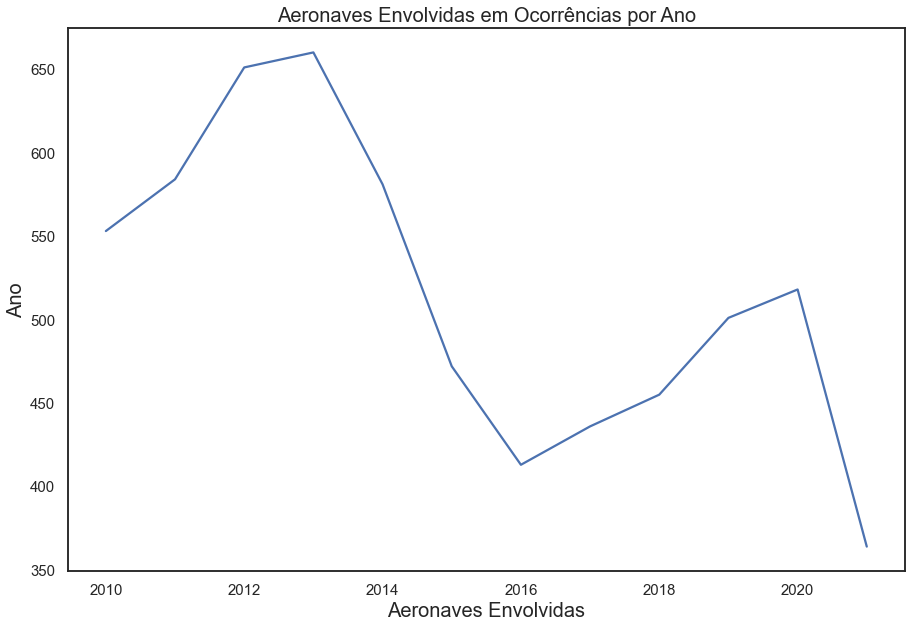

In [10]:
ocorrencias["ocorrencia_dia"] = pd.to_datetime(ocorrencias.ocorrencia_dia, format = '%d/%m/%Y') #Transformação para datetime

ano_e_total_de_aeronaves = ocorrencias.groupby(ocorrencias['ocorrencia_dia'].dt.year)['total_aeronaves_envolvidas'].agg(['sum'])
ano_e_total_de_aeronaves = ano_e_total_de_aeronaves.reset_index()
    
linha("Aeronaves Envolvidas em Ocorrências por Ano","Aeronaves Envolvidas", "Ano", ocorrencias,ano_e_total_de_aeronaves.iloc[:,0],ano_e_total_de_aeronaves.iloc[:,1])

A base vem sendo atualizada desde 2010 e na análise gráfica acima podemos perceber que houve uma **redução significativa do aeronaves envolvidas em ocorrências do ano de 2012 até 2016**, porém de **2016 até 2020 esse número vem novamente tendo um crescimento consideravel**, o que demonstra que há necessidade do estudo desses dados para pensar em medidas preventivas para segurança da aviação civil brasileira.

### <font color='#4F4F4F'>3.2.1) Identificação dos maiores eventos de ocorrência</font>

### <font color='#4F4F4F'>3.2.1.1) Investigando por Classificação</font>

In [11]:
#Transformação para datetime
ocorrencias["ocorrencia_hora"] = pd.to_datetime(ocorrencias.ocorrencia_hora, format = '%H:%M:%S')

#Criando filtros para investigação de ocorrencias por incidentes e incidentes graves
ocorrencias_incidente = ocorrencias.query("ocorrencia_classificacao == 'INCIDENTE' and ocorrencia_dia.dt.year > 2015")
ocorrencias_incidente_grave = ocorrencias.query("ocorrencia_classificacao == 'INCIDENTE GRAVE' and ocorrencia_dia.dt.year > 2015")

In [12]:
estatistica_classificacao = round(ocorrencias.groupby(ocorrencias.query("ocorrencia_dia.dt.year > 2015").ocorrencia_classificacao).describe().total_aeronaves_envolvidas,3)
estatistica_classificacao = estatistica_classificacao.reset_index()
estatistica_classificacao

,ocorrencia_classificacao,count,mean,std,min,25%,50%,75%,max
0,ACIDENTE,861.0,1.007,0.083,1.0,1.0,1.0,1.0,2.0
1,INCIDENTE,1388.0,1.012,0.116,1.0,1.0,1.0,1.0,3.0
2,INCIDENTE GRAVE,396.0,1.048,0.226,1.0,1.0,1.0,1.0,3.0


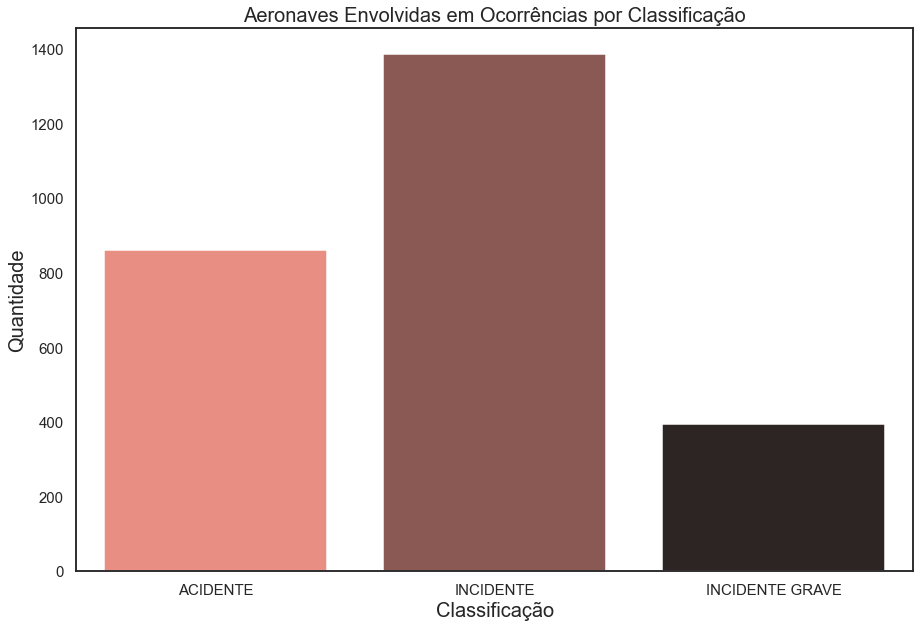

In [13]:
classificacao = pd.DataFrame(ocorrencias.query("ocorrencia_dia.dt.year > 2015").ocorrencia_classificacao.value_counts())
classificacao = classificacao.reset_index()
classificacao = formata_eixos(classificacao, "tipo_ocorrencia", "ocorrencia_classificacao")

barra("Aeronaves Envolvidas em Ocorrências por Classificação","Classificação", "Quantidade", ocorrencias.query("ocorrencia_dia.dt.year > 2015"), classificacao.tipo_ocorrencia.values, classificacao.quantidade.values)

É possível identificar que a classificação com o maior número de ocorrências fazem parte do tipo **incidente**, aproximadamente 52%, porém 15% são de classificação de **incidencia grave**. Ao longo dos últimos 6 anos, temos então uma média de 66 **incidentes graves** por ano o que é um número relevante.

Será investigado mais a fundo os dois tipos de classificação, ***incidente*** e ***incidente grave***.

### <font color='#4F4F4F'>3.2.1.2) Investigando por Estado</font>

In [14]:
estatistica_uf_incidentes = round(ocorrencias_incidente.groupby(ocorrencias_incidente.ocorrencia_uf).describe().total_aeronaves_envolvidas,3).sort_values(by=['count'], ascending=False).head(10)
estatistica_uf_incidentes = estatistica_uf_incidentes.reset_index()
estatistica_uf_incidentes

,ocorrencia_uf,count,mean,std,min,25%,50%,75%,max
0,SP,422.0,1.012,0.108,1.0,1.0,1.0,1.0,2.0
1,MG,141.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
2,PR,132.0,1.030,0.212,1.0,1.0,1.0,1.0,3.0
3,RJ,125.0,1.008,0.089,1.0,1.0,1.0,1.0,2.0
4,RS,66.0,1.015,0.123,1.0,1.0,1.0,1.0,2.0
5,SC,59.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
6,BA,47.0,1.043,0.204,1.0,1.0,1.0,1.0,2.0
7,MT,46.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
8,AM,43.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
9,PA,42.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0


In [15]:
estatistica_uf_incidentes_graves = round(ocorrencias_incidente_grave.groupby(ocorrencias_incidente_grave.ocorrencia_uf).describe().total_aeronaves_envolvidas,3).sort_values(by=['count'], ascending=False).head(10)
estatistica_uf_incidentes_graves = estatistica_uf_incidentes_graves.reset_index()
estatistica_uf_incidentes_graves

,ocorrencia_uf,count,mean,std,min,25%,50%,75%,max
0,SP,70.0,1.086,0.329,1.0,1.0,1.0,1.0,3.0
1,GO,47.0,1.064,0.247,1.0,1.0,1.0,1.0,2.0
2,MG,41.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
3,MT,37.0,1.027,0.164,1.0,1.0,1.0,1.0,2.0
4,PR,25.0,1.040,0.200,1.0,1.0,1.0,1.0,2.0
5,RS,23.0,1.043,0.209,1.0,1.0,1.0,1.0,2.0
6,MS,21.0,1.048,0.218,1.0,1.0,1.0,1.0,2.0
7,PA,18.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
8,RJ,17.0,1.118,0.332,1.0,1.0,1.0,1.0,2.0
9,BA,14.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0


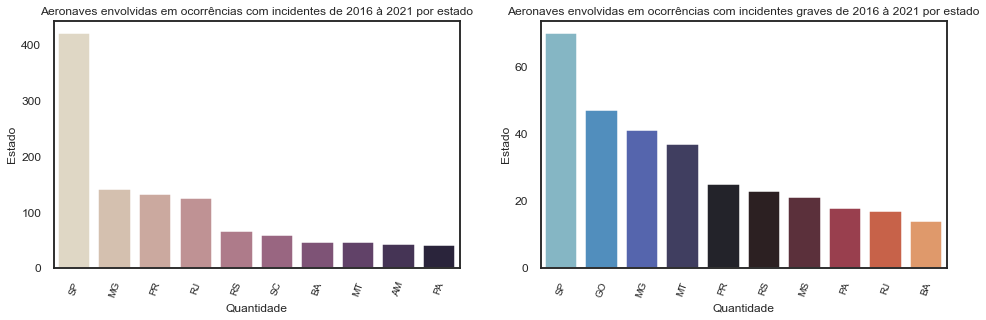

In [16]:
barra2("Aeronaves envolvidas em ocorrências com incidentes de 2016 à 2021 por estado","Aeronaves envolvidas em ocorrências com incidentes graves de 2016 à 2021 por estado","Quantidade","Estado", ocorrencias, estatistica_uf_incidentes.iloc[:,0], estatistica_uf_incidentes.iloc[:,1], ocorrencias,estatistica_uf_incidentes_graves.iloc[:,0],estatistica_uf_incidentes_graves.iloc[:,1]) 

Dos 27 estados brasileiros ao longo de 12 anos (2010 - nov/2021), **10 deles possuem 80% dos incidentes com aeronaves**, com ênfase em **SP, MG, PR, RJ que representam 59% dos incidentes**. Já para os incidentes graves, dos 27 estados brasileiros ao longo de 12 anos (2010 - nov/2021), **10 deles possuem 79% dos incidentes graves**, com ênfase também em **SP, GO, MG, MT que representam 39% dos incidentes graves**.

### <font color='#4F4F4F'>3.2.1.3) Investigando por Cidade</font>

In [17]:
estatistica_cidade_top_10_incidentes = round(ocorrencias_incidente.groupby(ocorrencias_incidente.ocorrencia_cidade).describe().total_aeronaves_envolvidas,3).sort_values(by=['count'], ascending=False).head(10)
estatistica_cidade_top_10_incidentes = estatistica_cidade_top_10_incidentes.reset_index()
estatistica_cidade_top_10_incidentes

,ocorrencia_cidade,count,mean,std,min,25%,50%,75%,max
0,SÃO PAULO,124.0,1.024,0.154,1.0,1.0,1.0,1.0,2.0
1,CAMPINAS,95.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
2,RIO DE JANEIRO,88.0,1.011,0.107,1.0,1.0,1.0,1.0,2.0
3,GUARULHOS,69.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
4,BELO HORIZONTE,67.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
5,LONDRINA,47.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
6,PORTO ALEGRE,43.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
7,CURITIBA,39.0,1.051,0.320,1.0,1.0,1.0,1.0,3.0
8,BRASÍLIA,37.0,1.027,0.164,1.0,1.0,1.0,1.0,2.0
9,RECIFE,33.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0


In [18]:
estatistica_cidade_top_10_incidentes_graves = round(ocorrencias_incidente_grave.groupby(ocorrencias_incidente_grave.ocorrencia_cidade).describe().total_aeronaves_envolvidas,3).sort_values(by=['count'], ascending=False).head(10)
estatistica_cidade_top_10_incidentes_graves = estatistica_cidade_top_10_incidentes_graves.reset_index()
estatistica_cidade_top_10_incidentes_graves

,ocorrencia_cidade,count,mean,std,min,25%,50%,75%,max
0,GOIÂNIA,24.0,1.125,0.338,1.0,1.0,1.0,1.0,2.0
1,BRAGANÇA PAULISTA,12.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
2,SÃO PAULO,12.0,1.167,0.389,1.0,1.0,1.0,1.0,2.0
3,BELO HORIZONTE,8.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
4,CURITIBA,7.0,1.143,0.378,1.0,1.0,1.0,1.0,2.0
5,RIO DE JANEIRO,7.0,1.143,0.378,1.0,1.0,1.0,1.0,2.0
6,BRASÍLIA,6.0,1.167,0.408,1.0,1.0,1.0,1.0,2.0
7,CAMPO GRANDE,6.0,1.167,0.408,1.0,1.0,1.0,1.0,2.0
8,RIO VERDE,5.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0
9,JUNDIAÍ,5.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0


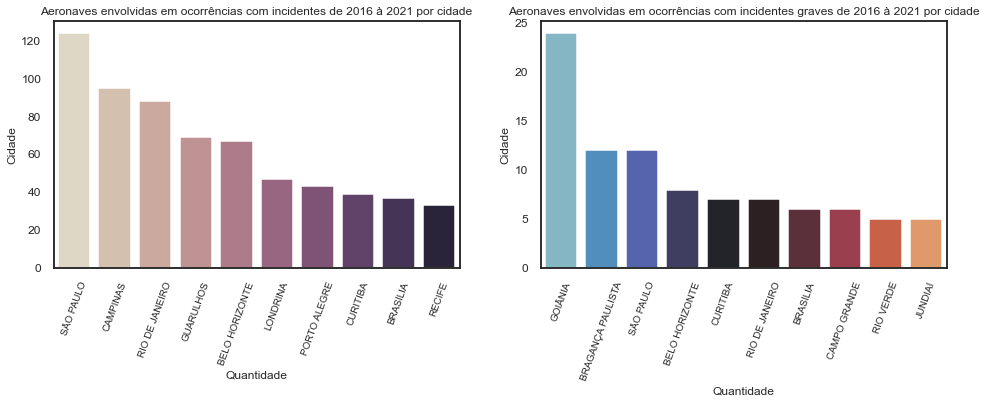

In [19]:
barra2("Aeronaves envolvidas em ocorrências com incidentes de 2016 à 2021 por cidade","Aeronaves envolvidas em ocorrências com incidentes graves de 2016 à 2021 por cidade","Quantidade","Cidade", ocorrencias, estatistica_cidade_top_10_incidentes.iloc[:,0], estatistica_cidade_top_10_incidentes.iloc[:,1], ocorrencias,estatistica_cidade_top_10_incidentes_graves.iloc[:,0],estatistica_cidade_top_10_incidentes_graves.iloc[:,1]) 

As 10 principais cidades com a maior ocorrencia de incidentes representam **46%**. As 10 principais cidades com a maior ocorrencia de incidentes graves representam **23%**, é possível também observar que **embora Goiás esteja em terceiro lugar em incidentes graves, a cidade de goiania é a que mais teve incidentes graves ao longo do periodo**.

### <font color='#4F4F4F'>3.2.1.4) Investigando por hora</font>

In [20]:
estatistica_hora_incidentes = round(ocorrencias_incidente.groupby(ocorrencias_incidente["ocorrencia_hora"].dt.strftime('%H')).describe().total_aeronaves_envolvidas,3).sort_values(by=['ocorrencia_hora'], ascending=True)
estatistica_hora_incidentes = estatistica_hora_incidentes.reset_index()
estatistica_hora_incidentes.head()

,ocorrencia_hora,count,mean,std,min,25%,50%,75%,max
0,00,24.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,01,28.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,02,30.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,03,25.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,04,15.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [21]:
estatistica_hora_incidentes_grave = round(ocorrencias_incidente_grave.groupby(ocorrencias_incidente_grave["ocorrencia_hora"].dt.strftime('%H')).describe().total_aeronaves_envolvidas,3).sort_values(by=['ocorrencia_hora'], ascending=True)
estatistica_hora_incidentes_grave = estatistica_hora_incidentes_grave.reset_index()
estatistica_hora_incidentes_grave.head()

,ocorrencia_hora,count,mean,std,min,25%,50%,75%,max
0,00,4.0,1.25,0.5,1.0,1.0,1.0,1.25,2.0
1,01,2.0,1.00,0.0,1.0,1.0,1.0,1.00,1.0
2,02,4.0,1.00,0.0,1.0,1.0,1.0,1.00,1.0
3,03,1.0,1.00,NaN,1.0,1.0,1.0,1.00,1.0
4,05,1.0,2.00,NaN,2.0,2.0,2.0,2.00,2.0


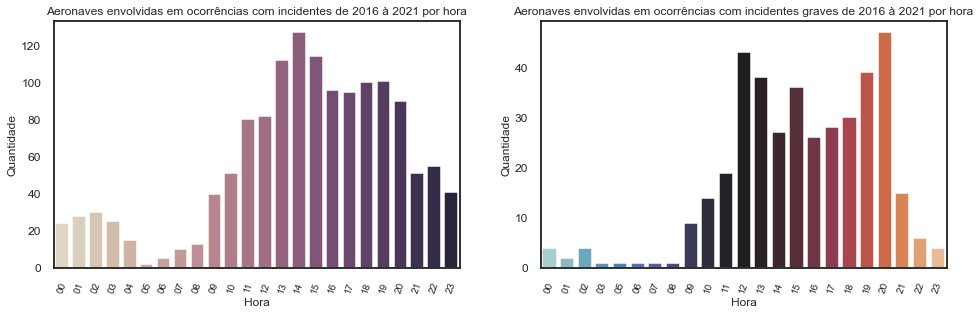

In [22]:
barra2("Aeronaves envolvidas em ocorrências com incidentes de 2016 à 2021 por hora","Aeronaves envolvidas em ocorrências com incidentes graves de 2016 à 2021 por hora","Hora","Quantidade", ocorrencias, estatistica_hora_incidentes.iloc[:,0], estatistica_hora_incidentes.iloc[:,1], ocorrencias,estatistica_hora_incidentes_grave.iloc[:,0],estatistica_hora_incidentes_grave.iloc[:,1])

É possível identificar que os picos mais frequentes nas ocorrencias com incidentes são no intervalo das **13-15 horas.** É possível identificar que os picos mais frequentes nas ocorrencias com incidentes graves acontece às **12 horas e no intervalo de 19-20 horas**.

***Resumo***

Portanto, no momento de **Identificação dos maiores eventos de ocorrência** conseguimos definir alguns pontos de partida para investigação maior dos tipos de ocorrências, fator de contribuições e aeronaves, eles são:

**Ocorrências com incidentes:** Dos 27 estados brasileiros ao longo de 12 anos (2010 - nov/2021), 10 deles possuem 80% dos incidentes com aeronaves, com ênfase em SP, MG, PR, RJ que representam 59% dos incidentes. As 10 principais cidades com a maior ocorrencia de incidentes representam 46%. É possível identificar que os picos mais frequentes nas ocorrencias com incidentes são no intervalo das 13-15 horas.

**Ocorrências com incidentes graves:** Já para os incidentes graves, dos 27 estados brasileiros ao longo de 12 anos (2010 - nov/2021), 10 deles possuem 79% dos incidentes graves, com ênfase também em SP, GO, MG, MT que representam 39% dos incidentes graves. As 10 principais cidades com a maior ocorrencia de incidentes graves representam 23%, é possível também observar que embora Goiás esteja em terceiro lugar em incidentes graves, a cidade de goiania é a que mais teve incidentes graves ao longo do periodo. É possível identificar que os picos mais frequentes nas ocorrencias com incidentes graves acontece às 12 horas e no intervalo de 19-20 horas.

### <font color='#4F4F4F'>3.2.2) Investigando o tipo de ocorrência, fator de contribuição e aeronave</font>

### <font color='#4F4F4F'>3.2.2.1) Investigando o tipo de ocorrência</font>

In [23]:
ocorrencias_mais_tipo = pd.merge(ocorrencias, tipo_de_ocorrencia, on="codigo_ocorrencia1", how="left")

ocorrencias_mais_tipo_incidente = ocorrencias_mais_tipo.query("ocorrencia_classificacao == 'INCIDENTE' and ocorrencia_dia.dt.year > 2015")
ocorrencias_mais_tipo_incidente_grave = ocorrencias_mais_tipo.query("ocorrencia_classificacao == 'INCIDENTE GRAVE' and ocorrencia_dia.dt.year > 2015")

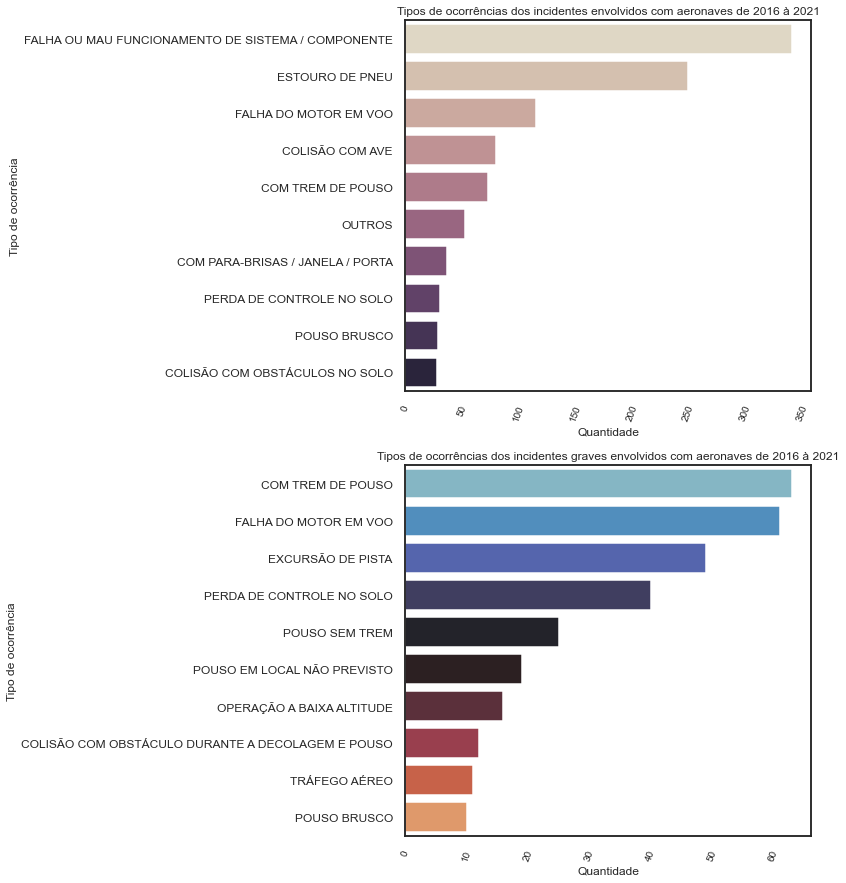

In [24]:
tipo_de_ocorrencia1 = formata_eixos(ocorrencias_mais_tipo_incidente.ocorrencia_tipo, "tipo_ocorrencia", "ocorrencia_tipo")
tipo_de_ocorrencia2 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.ocorrencia_tipo, "tipo_ocorrencia", "ocorrencia_tipo")

barra2invert("Tipos de ocorrências dos incidentes envolvidos com aeronaves de 2016 à 2021","Tipos de ocorrências dos incidentes graves envolvidos com aeronaves de 2016 à 2021","Quantidade","Tipo de ocorrência", ocorrencias_mais_tipo_incidente, tipo_de_ocorrencia1.quantidade.values, tipo_de_ocorrencia1.tipo_ocorrencia.values, ocorrencias_mais_tipo_incidente_grave, tipo_de_ocorrencia2.quantidade.values, tipo_de_ocorrencia2.tipo_ocorrencia.values)

Dos 10 tipos de ocorrêcias mais frequentes para incidentes, os 3 que tiveram maior recorrência de 2016 à 2021 representam 50%, são eles: **1) Falha ou mau funcionamento de sistema, 2) Estouro de pneu, 3) Falha do motor em voo**. Já dos 10 tipos de ocorrências mais frequentes em incidentes graves temos a presença de 4 mais recorrentes equivalendo 53%, são elas: **1) Com trem de pouso, 2) Falha do motor em voo, 3) excursão de pista**.

É possível perceber que há uma relevante frequência de ocorrencias tanto em incidentes leves como nos graves de **falha do motor e falha de sistemas de trem de pouso ou outros**.

### <font color='#4F4F4F'>3.2.2.2) Investigando o fator de contribuição</font>

In [25]:
ocorrencias_mais_tipo = pd.merge(ocorrencias, fator_contribuinte, on="codigo_ocorrencia3", how="left")

ocorrencias_mais_tipo_incidente = ocorrencias_mais_tipo.query("ocorrencia_classificacao == 'INCIDENTE'") #Não há dados de fator de contribuição de 2015 em diante 
ocorrencias_mais_tipo_incidente_grave = ocorrencias_mais_tipo.query("ocorrencia_classificacao == 'INCIDENTE GRAVE' and ocorrencia_dia.dt.year > 2015")

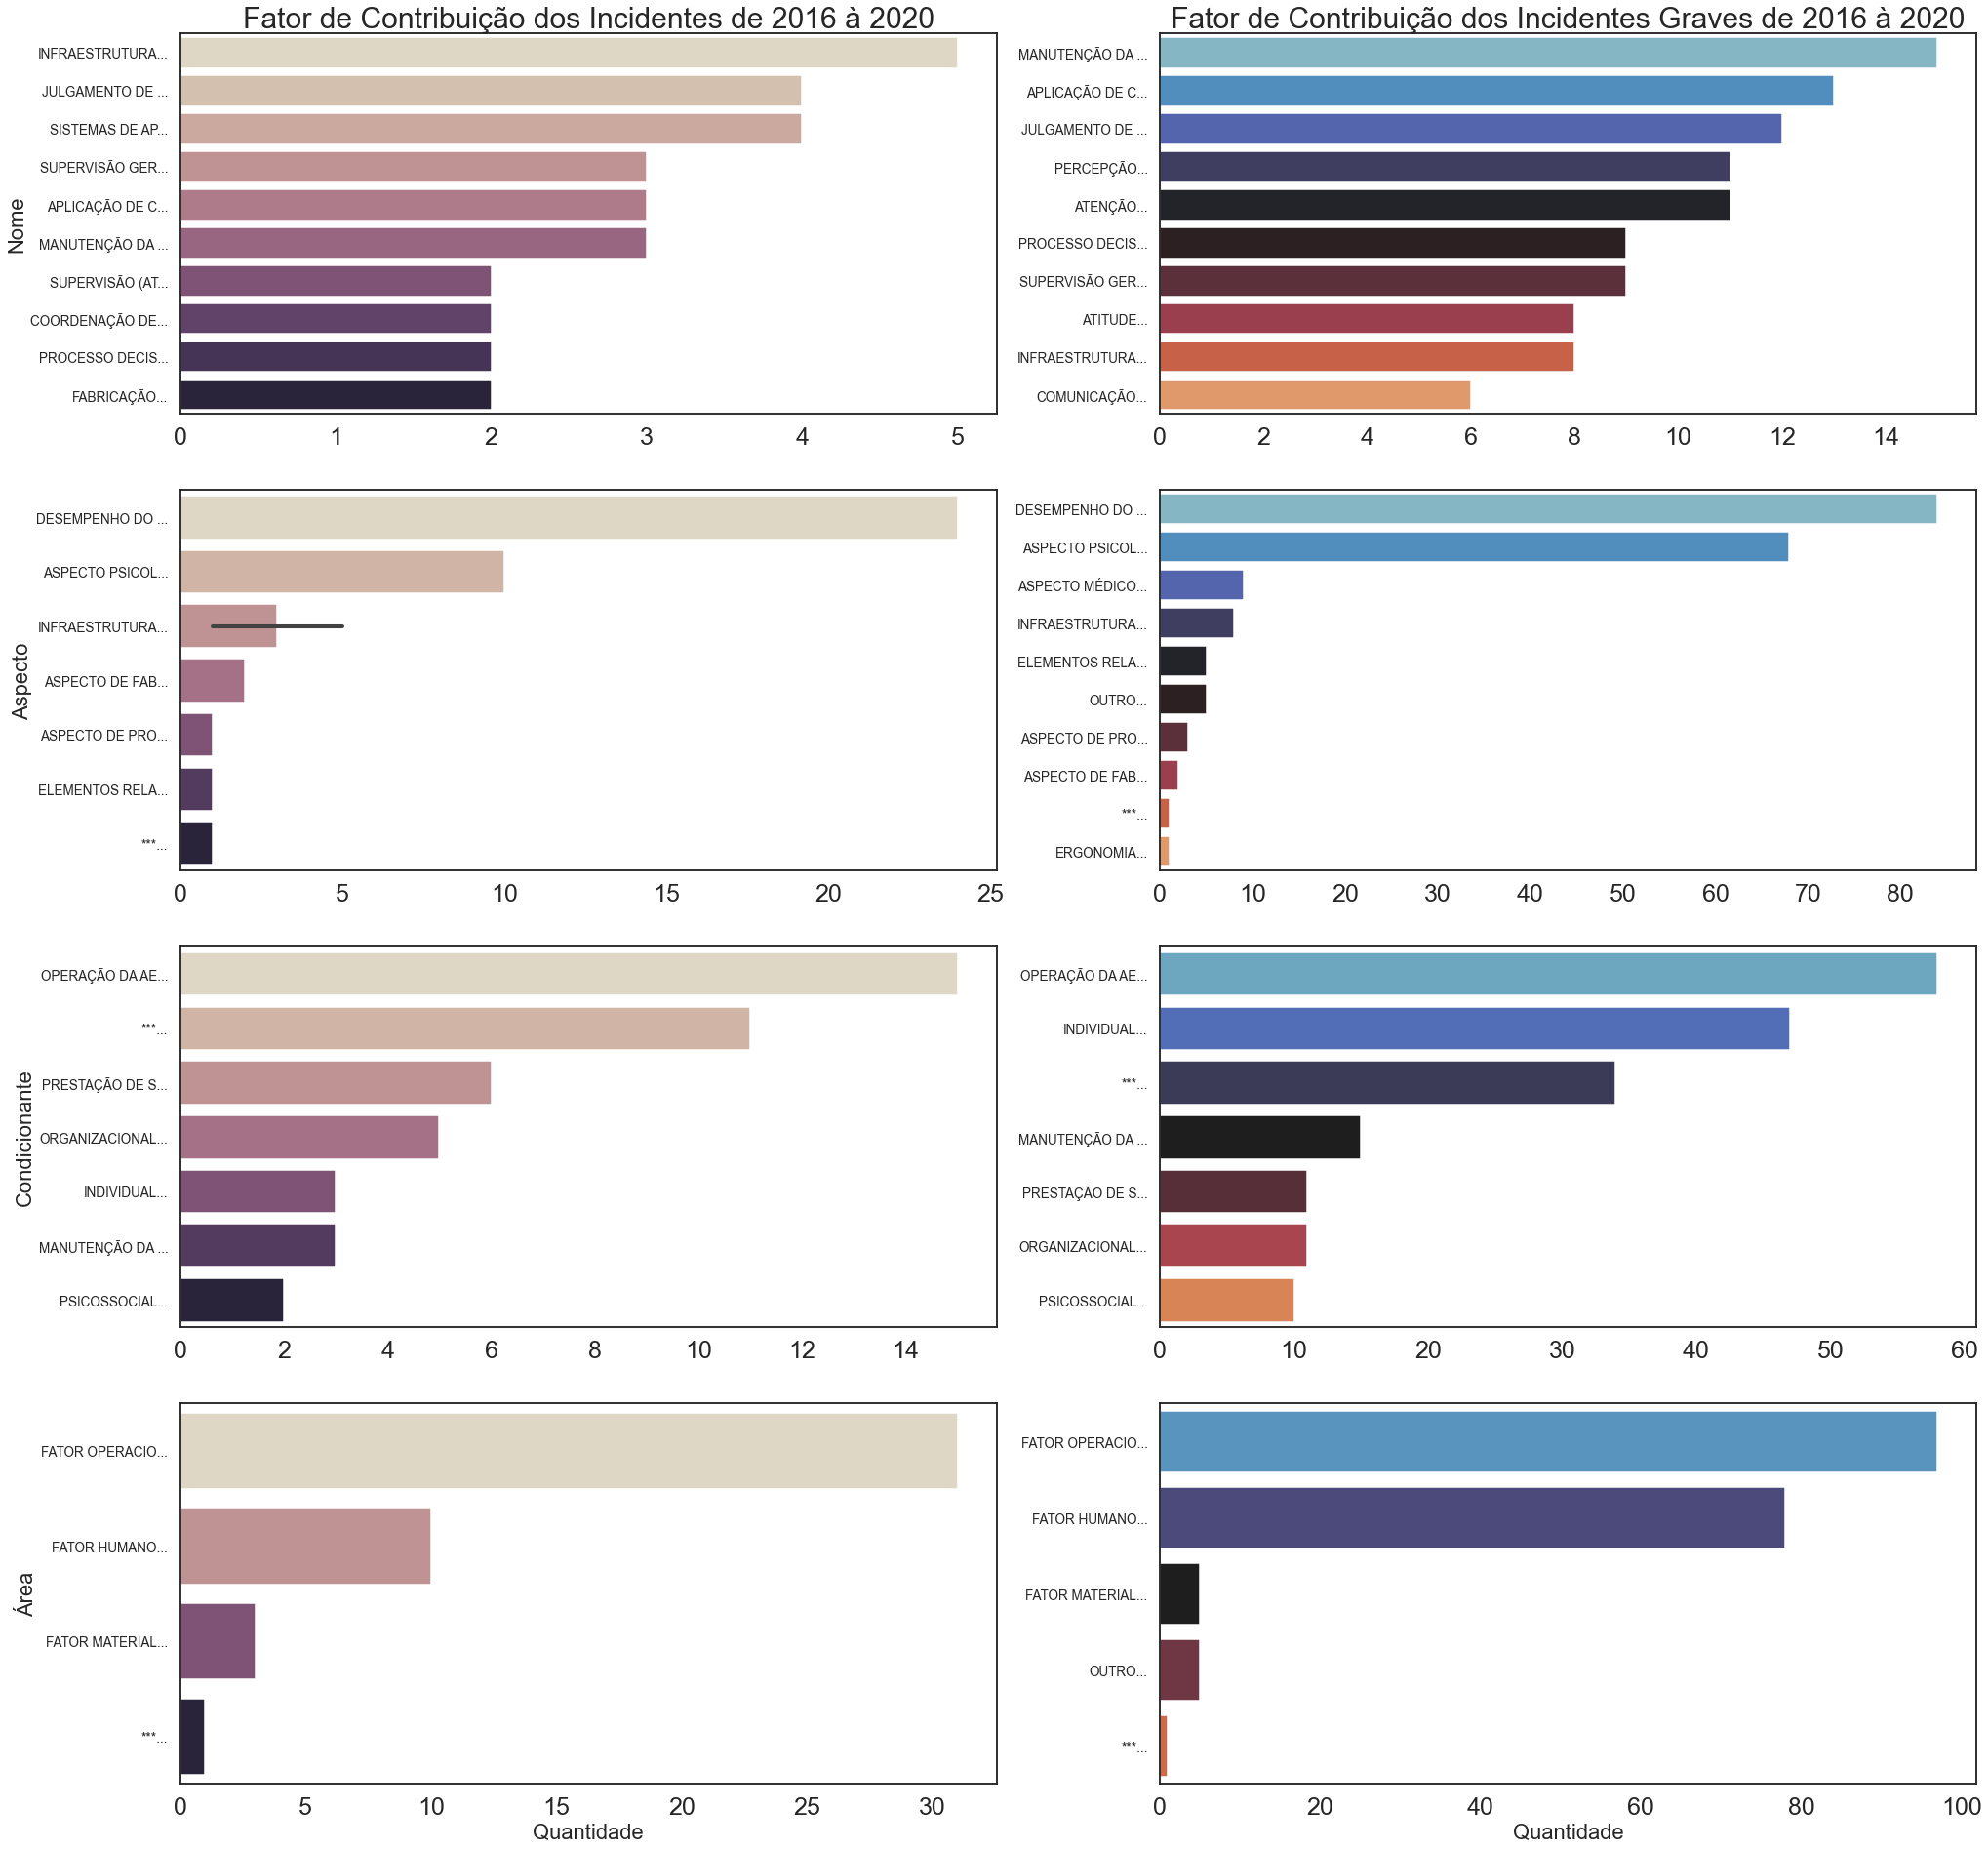

In [26]:
fator_contribuinte1 = formata_eixos(ocorrencias_mais_tipo_incidente.fator_nome, "tipo_ocorrencia", "fator_nome")
fator_contribuinte2 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.fator_nome, "tipo_ocorrencia", "fator_nome")
fator_contribuinte3 = formata_eixos(ocorrencias_mais_tipo_incidente.fator_aspecto, "tipo_ocorrencia", "fator_aspecto")
fator_contribuinte4 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.fator_aspecto, "tipo_ocorrencia", "fator_aspecto")
fator_contribuinte5 = formata_eixos(ocorrencias_mais_tipo_incidente.fator_condicionante, "tipo_ocorrencia", "fator_condicionante")
fator_contribuinte6 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.fator_condicionante, "tipo_ocorrencia", "fator_condicionante")
fator_contribuinte7 = formata_eixos(ocorrencias_mais_tipo_incidente.fator_area, "tipo_ocorrencia", "fator_area")
fator_contribuinte8 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.fator_area, "tipo_ocorrencia", "fator_area")

f1 = encurta_eixo_x(fator_contribuinte1.tipo_ocorrencia.values, "f1")
f2 = encurta_eixo_x(fator_contribuinte2.tipo_ocorrencia.values, "f2")
f3 = encurta_eixo_x(fator_contribuinte3.tipo_ocorrencia.values, "f3")
f4 = encurta_eixo_x(fator_contribuinte4.tipo_ocorrencia.values, "f4")
f5 = encurta_eixo_x(fator_contribuinte5.tipo_ocorrencia.values, "f5")
f6 = encurta_eixo_x(fator_contribuinte6.tipo_ocorrencia.values, "f6")
f7 = encurta_eixo_x(fator_contribuinte7.tipo_ocorrencia.values, "f7")
f8 = encurta_eixo_x(fator_contribuinte8.tipo_ocorrencia.values, "f8")

barra2invert4("Fator de Contribuição dos Incidentes de 2016 à 2020","Fator de Contribuição dos Incidentes Graves de 2016 à 2020", "Nome","Aspecto","Condicionante","Área", "Quantidade", ocorrencias_mais_tipo_incidente, fator_contribuinte1.quantidade.values, f1,  ocorrencias_mais_tipo_incidente_grave, fator_contribuinte2.quantidade.values, f2, ocorrencias_mais_tipo_incidente, fator_contribuinte3.quantidade.values, f3, ocorrencias_mais_tipo_incidente_grave, fator_contribuinte4.quantidade.values, f4,  ocorrencias_mais_tipo_incidente, fator_contribuinte5.quantidade.values, f5, ocorrencias_mais_tipo_incidente_grave, fator_contribuinte6.quantidade.values, f6, ocorrencias_mais_tipo_incidente, fator_contribuinte7.quantidade.values, f7, ocorrencias_mais_tipo_incidente_grave,  fator_contribuinte8.quantidade.values, f8)

Acima investigamos os tipos de ocorrências e agora podemos identificar os fatores que contribuiram para esses tipos de ocorrências acontecerem:

**Fator de contribuição para os incidentes:** Dos três fatores em incidentes mais frequentes citados acima (1- Falha ou mau funcionamento de sistema, 2- Estouro de pneu, 3- Falha do motor em voo) temos os seus respecitos fatores de contribuições mais relevantes:

1) Nome - Infraestrutura Aeroportuária / Sistemas De Apoio / Julgamento De Pilotagem

2) Aspecto - Desempenho Do Ser Humano / Aspecto Psicológico

3) Condicionante - Operação Da Aeronave

4) Área - Fator Operacional

É possível perceber que mesmo o problema tendo sido operacional, **muito esteve envolvido o desempenho humano nesse tipo de problema**, que por mais que os incidentes leves tenham acontecido por falhas na aeronave, as manutenções, checagem de pneus, entre outros são feitos por pessoas e esses procedimentos precisam ser bem checados.



**Fator de contribuição para os incidentes graves:** Dos três fatores em incidentes mais frequentes citados acima (1- Com trem de pouso, 2- Falha do motor em voo, 3- excursão de pista) temos os seus respecitos fatores de contribuições mais relevantes:

1) Nome - Manutenção Da Aeronave / Aplicação De Comandos / Julgamento De Pilotagem

2) Aspecto - Desempenho Do Ser Humano / Aspecto Psicológico

3) Condicionante - Operação Da Aeronave / Individual

4) Área - Fator Operacional / Fator Humano

Nos incidentes fatais **o impacto das manutenções é um dos fatores mais relevantes, porém o fator humano também continua sendo aspecto recorrente**, demonstrando ainda mais que treinamentos, procedimentos precisam ser reformulados para evitar os incidentes graves.

### <font color='#4F4F4F'>3.2.2.3) Investigando a aeronave</font>

In [27]:
ocorrencias_mais_tipo = pd.merge(ocorrencias, aeronave, on="codigo_ocorrencia2", how="left")

ocorrencias_mais_tipo_incidente = ocorrencias_mais_tipo.query("ocorrencia_classificacao == 'INCIDENTE' and ocorrencia_dia.dt.year > 2015")
ocorrencias_mais_tipo_incidente_grave = ocorrencias_mais_tipo.query("ocorrencia_classificacao == 'INCIDENTE GRAVE' and ocorrencia_dia.dt.year > 2015")

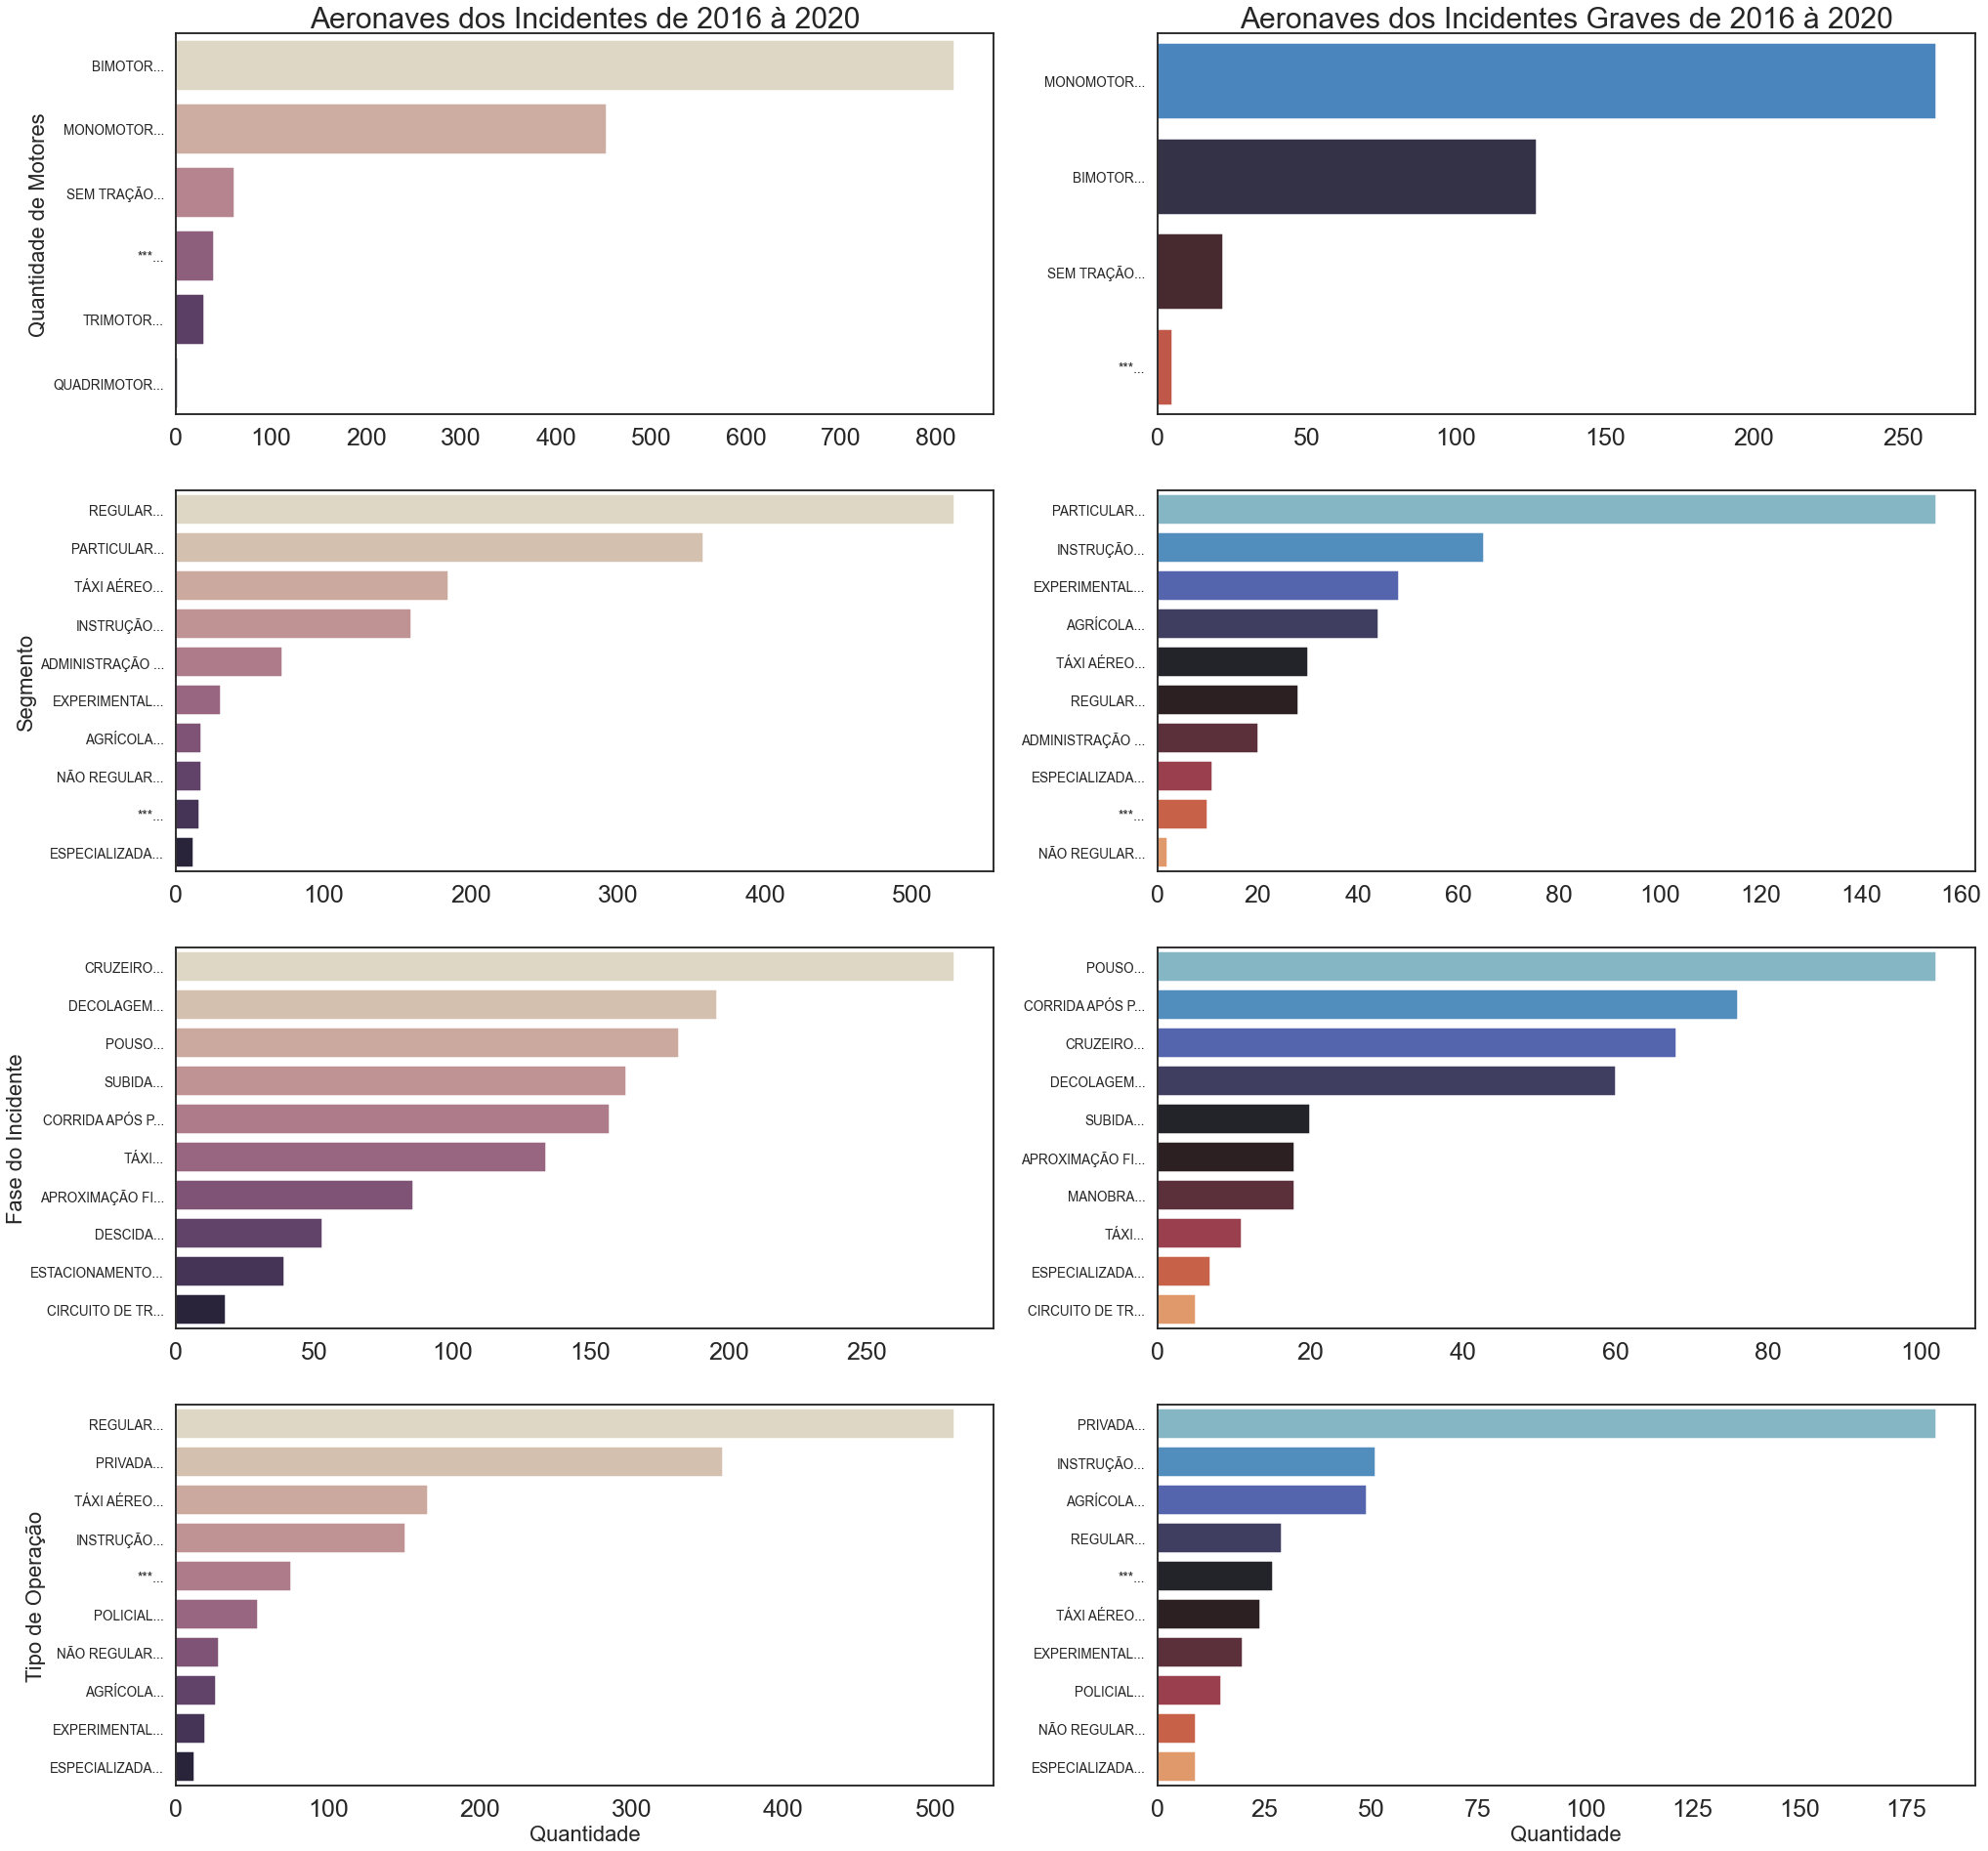

In [28]:
fator_contribuinte1 = formata_eixos(ocorrencias_mais_tipo_incidente.aeronave_motor_quantidade, "tipo_ocorrencia", "aeronave_motor_quantidade")
fator_contribuinte2 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.aeronave_motor_quantidade, "tipo_ocorrencia", "aeronave_motor_quantidade")
fator_contribuinte3 = formata_eixos(ocorrencias_mais_tipo_incidente.aeronave_registro_segmento, "tipo_ocorrencia", "aeronave_registro_segmento")
fator_contribuinte4 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.aeronave_registro_segmento, "tipo_ocorrencia", "aeronave_registro_segmento")
fator_contribuinte5 = formata_eixos(ocorrencias_mais_tipo_incidente.aeronave_fase_operacao, "tipo_ocorrencia", "aeronave_fase_operacao")
fator_contribuinte6 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.aeronave_fase_operacao, "tipo_ocorrencia", "aeronave_fase_operacao")
fator_contribuinte7 = formata_eixos(ocorrencias_mais_tipo_incidente.aeronave_tipo_operacao, "tipo_ocorrencia", "aeronave_tipo_operacao")
fator_contribuinte8 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.aeronave_tipo_operacao, "tipo_ocorrencia", "aeronave_tipo_operacao")

f1 = encurta_eixo_x(fator_contribuinte1.tipo_ocorrencia.values, "f1")
f2 = encurta_eixo_x(fator_contribuinte2.tipo_ocorrencia.values, "f2")
f3 = encurta_eixo_x(fator_contribuinte3.tipo_ocorrencia.values, "f3")
f4 = encurta_eixo_x(fator_contribuinte4.tipo_ocorrencia.values, "f4")
f5 = encurta_eixo_x(fator_contribuinte5.tipo_ocorrencia.values, "f5")
f6 = encurta_eixo_x(fator_contribuinte6.tipo_ocorrencia.values, "f6")
f7 = encurta_eixo_x(fator_contribuinte7.tipo_ocorrencia.values, "f7")
f8 = encurta_eixo_x(fator_contribuinte8.tipo_ocorrencia.values, "f8")


barra2invert4("Aeronaves dos Incidentes de 2016 à 2020","Aeronaves dos Incidentes Graves de 2016 à 2020", "Quantidade de Motores", "Segmento", "Fase do Incidente", "Tipo de Operação", "Quantidade", ocorrencias_mais_tipo_incidente, fator_contribuinte1.quantidade.values, f1,  ocorrencias_mais_tipo_incidente_grave, fator_contribuinte2.quantidade.values, f2, ocorrencias_mais_tipo_incidente, fator_contribuinte3.quantidade.values, f3, ocorrencias_mais_tipo_incidente_grave, fator_contribuinte4.quantidade.values, f4,  ocorrencias_mais_tipo_incidente, fator_contribuinte5.quantidade.values, f5, ocorrencias_mais_tipo_incidente_grave, fator_contribuinte6.quantidade.values, f6, ocorrencias_mais_tipo_incidente, fator_contribuinte7.quantidade.values, f7, ocorrencias_mais_tipo_incidente_grave,  fator_contribuinte8.quantidade.values, f8)

Além de ter estudado os tipos de ocorrências e os fatores gerados, também é importante entender como isso impacta nos diferentes tipos de aeronaves para perceber se os problemas operacionais e humanos podem ser melhorados em especifico.

**Informações das aeronaves nos incidentes:** Dos três principais fatores de contribuições acima (1- Infraestrutura Aeroportuária, 2- Sistemas De Apoio, 3-Julgamento De Pilotagem), as principais informações das aeronaves nos acontecimentos foram:

1) Quantidade De Motores - Bimotor / Monomotor

2) Segmento - Regular / Particular / Táxi Aéreo

3) Fase Do Incidente - Cruzeiro / Decolagem / Pouso

4) Tipo De Operação - Regular / Privada

Percebe-se que a maioria dos fatores de contribuições foram em voos pequenos nos casos dos incidentes e o fato de terem acontecido muitos fatores relacionado a sistemas de apoio e infraestutura aeroportuaria pode ser associado aos pequenos voos em aeroportos menores e por consequência com exigencias menores de legislação.



**Informações das aeronaves nos incidentes graves:** Dos três principais fatores de contribuições acima (1-Manutenção Da Aeronave, 2-Aplicação De Comandos, 3-Julgamento De Pilotagem), as principais informações das aeronaves nos acontecimentos foram:

1) Quantidade De Motores - Monomotor / Bimotor

2) Segmento - Particular / Instrução / Experimental

3) Fase Do Incidente - Pouso / Corrida Após Pouso

4) Tipo De Operação - Privada / Instrução

Nos voos onde aconteceram incidentes graves, a maioria aconteceram também em voos pequenos o que também pode recorrer a legislação mais leve para esse tipo de operação, além disso, vale ressaltar que a fase desses voos aconteceram quase que em totalidade no pouso o que justifica os fatores de contribuição serem humanos.

### <font color='#4F4F4F'>3.2.3) Investigando as recomendações</font>

In [29]:
ocorrencias_mais_tipo = pd.merge(ocorrencias, recomendação_de_seguranca, on="codigo_ocorrencia4", how="left")

#Transformação para datetime
ocorrencias_mais_tipo["recomendacao_dia_assinatura"] = pd.to_datetime(ocorrencias_mais_tipo.recomendacao_dia_assinatura, format = '%Y-%m-%d')
tempo_da_ocorrencia_a_recomendacao = (ocorrencias_mais_tipo.recomendacao_dia_assinatura - ocorrencias_mais_tipo.ocorrencia_dia)
ocorrencias_mais_tipo["tempo_da_ocorrencia_a_recomendacao"] = tempo_da_ocorrencia_a_recomendacao

#Transformação para dias
tempo_dias = []
for i in ocorrencias_mais_tipo["tempo_da_ocorrencia_a_recomendacao"]:
    a = i.days
    tempo_dias.append(a)
ocorrencias_mais_tipo["tempo_da_ocorrencia_a_recomendacao"] = tempo_dias

ocorrencias_mais_tipo_incidente = ocorrencias_mais_tipo.query("ocorrencia_classificacao == 'INCIDENTE' and ocorrencia_dia.dt.year > 2015")
ocorrencias_mais_tipo_incidente_grave = ocorrencias_mais_tipo.query("ocorrencia_classificacao == 'INCIDENTE GRAVE' and ocorrencia_dia.dt.year > 2015")

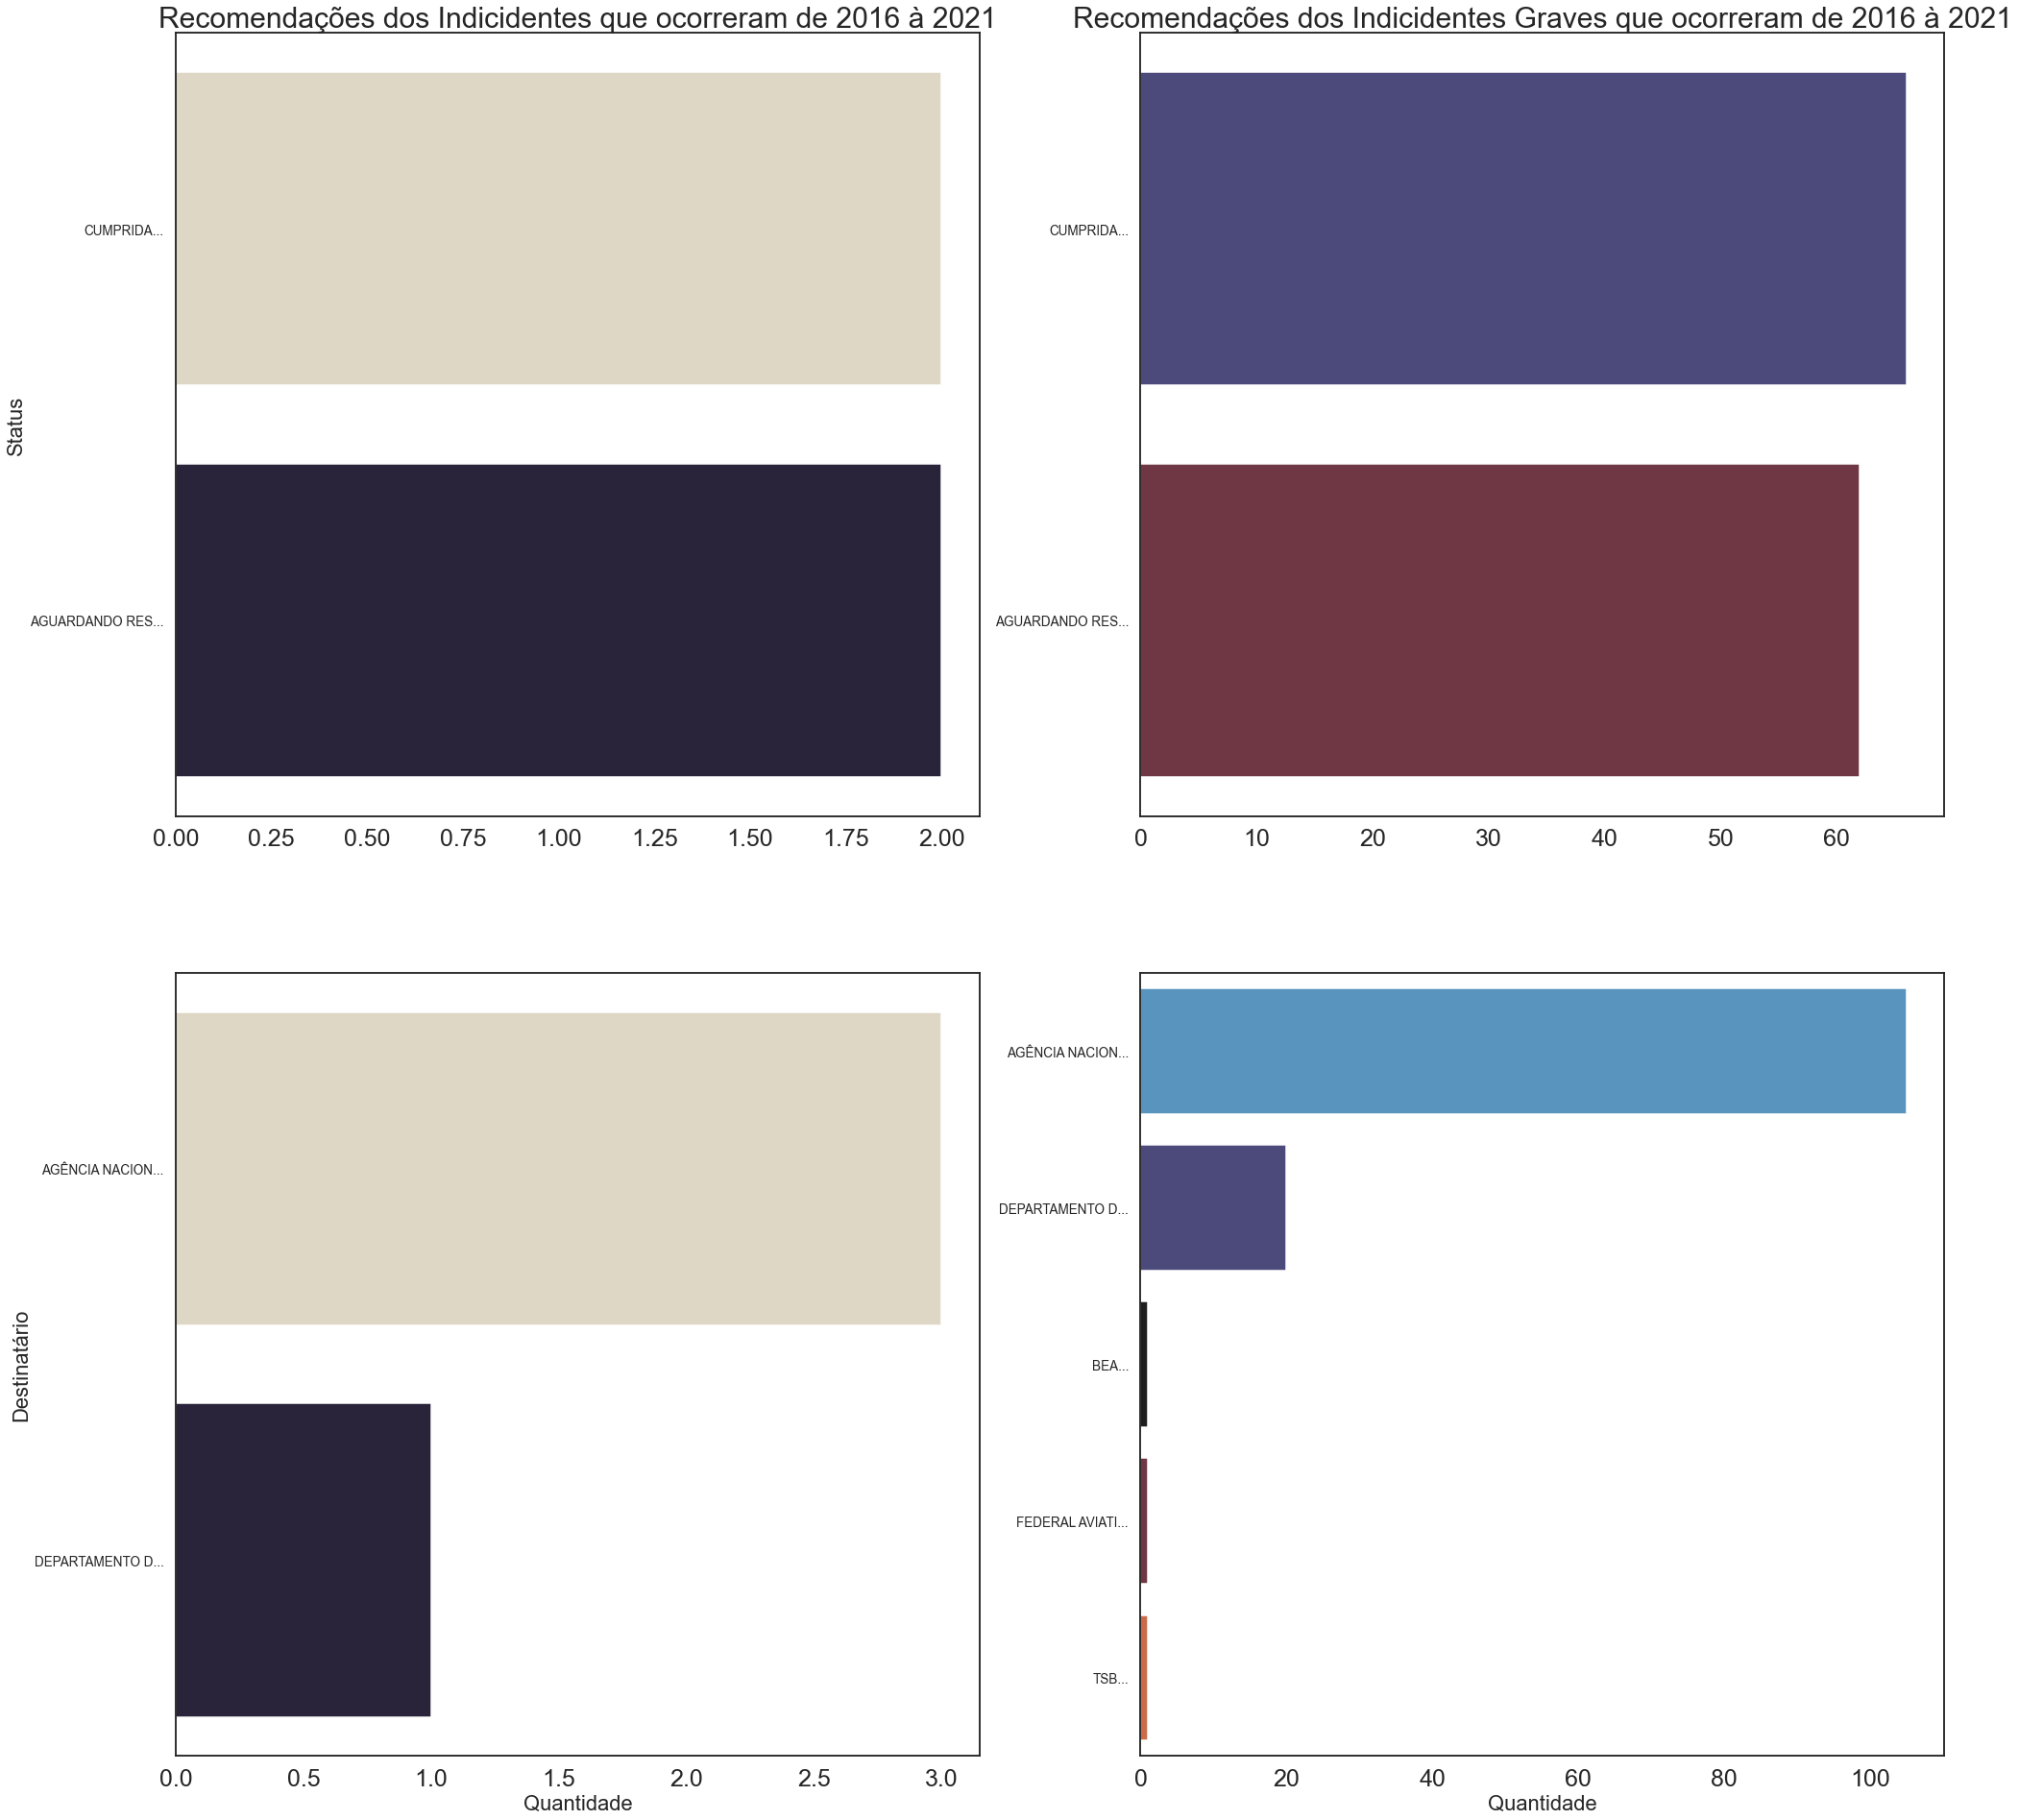

In [30]:
tipo_de_ocorrencia1 = formata_eixos(ocorrencias_mais_tipo_incidente.recomendacao_status, "tipo_ocorrencia", "recomendacao_status")
tipo_de_ocorrencia2 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.recomendacao_status, "tipo_ocorrencia", "recomendacao_status")
fator_contribuinte3 = formata_eixos(ocorrencias_mais_tipo_incidente.recomendacao_destinatario, "tipo_ocorrencia", "recomendacao_destinatario")
fator_contribuinte4 = formata_eixos(ocorrencias_mais_tipo_incidente_grave.recomendacao_destinatario, "tipo_ocorrencia", "recomendacao_destinatario")

f1 = encurta_eixo_x(tipo_de_ocorrencia1.tipo_ocorrencia.values, "f1")
f2 = encurta_eixo_x(tipo_de_ocorrencia2.tipo_ocorrencia.values, "f2")
f3 = encurta_eixo_x(fator_contribuinte3.tipo_ocorrencia.values, "f3")
f4 = encurta_eixo_x(fator_contribuinte4.tipo_ocorrencia.values, "f4")

barra2invert2("Recomendações dos Indicidentes que ocorreram de 2016 à 2021","Recomendações dos Indicidentes Graves que ocorreram de 2016 à 2021","Quantidade","Status", "Destinatário", ocorrencias_mais_tipo_incidente, tipo_de_ocorrencia1.quantidade.values, f1, ocorrencias_mais_tipo_incidente_grave, tipo_de_ocorrencia2.quantidade.values, f2, ocorrencias_mais_tipo_incidente, fator_contribuinte3.quantidade.values, f3, ocorrencias_mais_tipo_incidente_grave, fator_contribuinte4.quantidade.values, f4)

Embora se tenha poucos dados referentes as recomendações para os incidentes, podemos perceber que tanto para os incidentes leves e graves de 2016 até 2021 temos aproximadamente **50% em andamento** e com mais de **90% sendo a Agência Nacional de Aviação Civil sendo responsáveis pela investigação**.

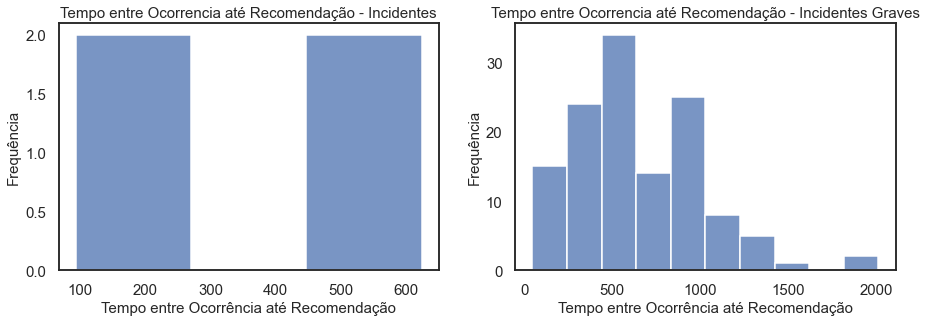

In [31]:
histograma2("Tempo entre Ocorrencia até Recomendação - Incidentes", "Tempo entre Ocorrencia até Recomendação - Incidentes Graves", "Tempo entre Ocorrência até Recomendação", "Frequência", ocorrencias_mais_tipo_incidente, ocorrencias_mais_tipo_incidente.tempo_da_ocorrencia_a_recomendacao, ocorrencias_mais_tipo_incidente_grave, ocorrencias_mais_tipo_incidente_grave.tempo_da_ocorrencia_a_recomendacao)

Como mencionado acima, embora os poucos dados em relação as recomendações dos incidentes comprometam a análise, no caso dos incidentes graves podemos perceber que há um **tempo de recomendação muito longo, o que pode comprometer a reincidência de acidentes por falhas que poderiam ser evitáveis**.

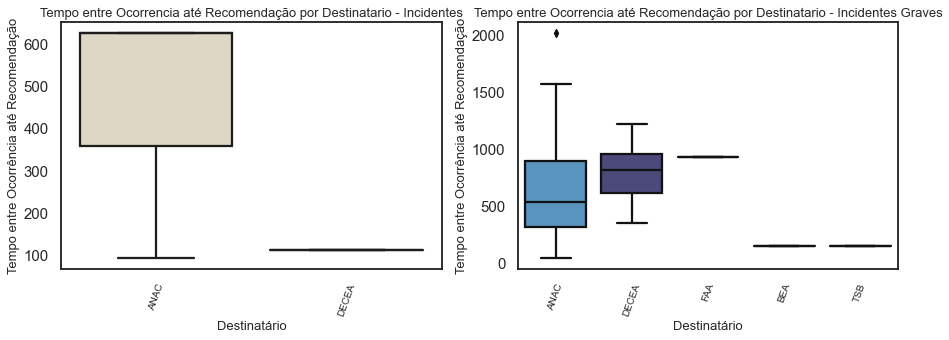

In [32]:
box2("Tempo entre Ocorrencia até Recomendação por Destinatario - Incidentes", "Tempo entre Ocorrencia até Recomendação por Destinatario - Incidentes Graves", "Destinatário", "Tempo entre Ocorrência até Recomendação", ocorrencias_mais_tipo_incidente, ocorrencias_mais_tipo_incidente.recomendacao_destinatario_sigla, ocorrencias_mais_tipo_incidente.tempo_da_ocorrencia_a_recomendacao, ocorrencias_mais_tipo_incidente_grave, ocorrencias_mais_tipo_incidente_grave.recomendacao_destinatario_sigla, ocorrencias_mais_tipo_incidente_grave.tempo_da_ocorrencia_a_recomendacao)

Novamente observando que temos poucos dados em relação as recomendações para o caso dos incidentes leves, porém nos casos de incidentes graves onde temos mais tempos podemos perceber que a ANAC que representa 25% das recomendações dos 396 incidentes graves e 82% dos 128 investigações abertas possui uma variabilidade muito alta para liberação da recomendação, fato esse que pode estar acontecendo por conta do acumulo de ocorrências, uma vez que a DECEA que obtem 15% das recomendações abertas possui uma variabilidade menor. Toda via, a ANAC ainda possui uma mediana menor em relação a DECEA, porém ainda muito alto, tendo casos de mais de 2 anos.

***Resumo***

Portanto, na investigação em relação as recomendações conseguimos identificar alguns pontos cruciais em relação ao status, destinatário e tempo de recomendação:

Embora se tenha poucos dados referentes as recomendações para os incidentes, podemos perceber que tanto para os incidentes leves e graves de 2016 até 2021 temos aproximadamente **50% em andamento** e com mais de **90% sendo a Agência Nacional de Aviação Civil sendo responsáveis pela investigação**. Como mencionado acima, embora os poucos dados em relação as recomendações dos incidentes comprometam a análise, no caso dos incidentes graves podemos perceber que há um **tempo de recomendação muito longo, o que pode comprometer a reincidência de acidentes por falhas que poderiam ser evitáveis**. Novamente observando que temos poucos dados em relação as recomendações para o caso dos incidentes leves, porém nos casos de incidentes graves onde temos mais tempos podemos perceber que a ANAC que representa 25% das recomendações dos 396 incidentes graves e 82% dos 128 investigações abertas possui uma variabilidade muito alta para liberação da recomendação, fato esse que pode estar acontecendo por conta do acumulo de ocorrências, uma vez que a DECEA que obtem 15% das recomendações abertas possui uma variabilidade menor. Toda via, a ANAC ainda possui uma mediana menor em relação a DECEA, porém ainda muito alto, tendo casos de mais de 2 anos.

# 4) Hipóteses Levantadas

Com a exploração feita acima, alguns insights surgiram referentes a linha de raciocínio e hipóteses unidas a ações para mitigar possíveis riscos e propor melhorias para aviação, abaixo temos o **resumo dos incidentes e incidentes graves**:

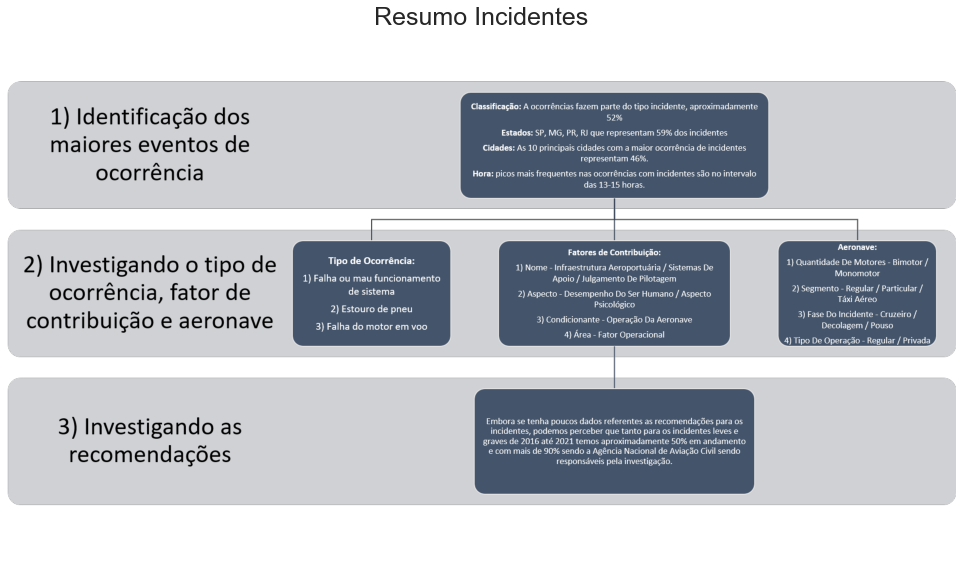

In [33]:
resumo_incidentes = mpimg.imread('Resumo Incidentes.png')
plt.figure(figsize=(17,10))
plt.axis('off')
plt.imshow(resumo_incidentes)
plt.title("Resumo Incidentes", fontsize = 25)
plt.show()

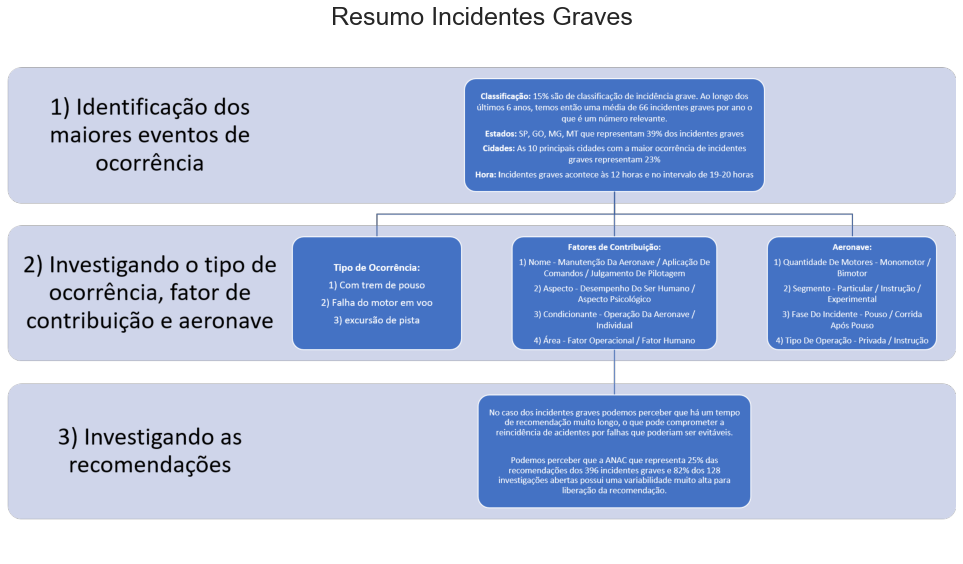

In [34]:
resumo_incidentes_graves = mpimg.imread('Resumo Incidentes Graves.png')
plt.figure(figsize=(17,10))
plt.axis('off')
plt.imshow(resumo_incidentes_graves)
plt.title("Resumo Incidentes Graves", fontsize = 25)
plt.show()

De acordo com a perspectiva seguida, temos as seguintes hipóteses e ações de melhoria propostas:

   **a) Hipótese:** Um dos fatores para a maior recorrência dos incidentes e incidentes graves acontecerem em voos particulares pode estar associado ao fato dos pilotos terem muitas atribuições para operacionalização dos voos. Enquanto nos voos comercial os pilotes cuidam somente do plano de voo e a pilotagem, os pilotos de voos particulares, táxi aéreo em sua maioria resolvem muitas coisas da operação, o que pode impactar no desgaste e aumento da probabilidade de ocorrência de incidentes.
    
   Ação: Exigir que as empresas tenham a mínima estrutura para garantir maior segurança para a operacionalização.
    
   **b) Hipótese:** O tempo de investigação dos incidentes e incidentes graves é muito elevado devido a concentração das investigações pela ANAC o que pode recorrer em mais incidentes pela demora de aplicação das recomendações.
    
   Ação: Cooparticipação nas investigações com demais orgãos para agilizar o processo de recomendação.

   **c) Hipótese:** É possível que os incidentes e incidentes graves ocorram em sua maioria nos principais estados por conta do volume dos voos, porém o fato não justifica a grande quantidade de incidentes por falha de sistemas uma vez que os aerodromos possuem uma melhor infraestrutura. A hipótese é que esses voos em sua maioria particulares e táxi aéreos talvez estejam economizando em manutenção e checagem das aeronaves.

   Ação: Maior legislação para aumentar a garantia da segurança dos voos.
    
   **d) Hipótese:** Apesar das ocorrências serem em maioria de riscos operacionais para os incidentes, porém o fator humano ainda é intrínseco ao processo, portanto uma das hipóteses é que por serem voos pequenos, a exigência de uma maior capacitação, horas de voos e experiência não é uma das maiores prioridades para o piloto.
    
   Ação: Exigir maiores capacitações e horas de voos teste para pilotos poderem retirar a carteira de aviação.
   

# 5) Conclusões e Insights Gerados

Por fim, ao final do estudo foi possível cumprir com o objetivo de conduzir uma análise exploratória para identificar o comportamento dos dados do CENIPA de 2016 à 2020 que por sua vez obteve um aumento de ocorrência. Além disso, o estudo teve foco em investigar os "incidentes" pelo alto volume e os "incidentes graves" para evitar fatalidades na aviação.

Ao longo o estudo segmentado em 3 investigações foi possível entender um pouco mais sobre as ocorrências, tipo de ocorrência, fator de contribuição, aeronave e recomendações. Com isso, os principais insights geradores das ocorrências de incidentes e incidentes graves foram:

**1) Excesso de atribuições para os pilotos da aviação particular/táxi aéreo;**

**2) Tempo de aplicação de recomendação longo;**

**3) Baixa investigação da operacionalização dos serviços de voos pequenos;**

**4) Baixa exigência de capacitações e horas de voos.**

Além disso, também foram propostas ações para mitigar os riscos acima citados:

**1) Exigir que as empresas tenham a mínima estrutura para garantir maior segurança para a operacionalização;**

**2) Cooparticipação nas investigações com demais orgãos para agilizar o processo de recomendação;**

**3) Maior legislação para aumentar a garantia da segurança dos voos;**

**4) Exigir maiores capacitações e horas de voos teste para pilotos poderem retirar a carteira de aviação.**